In [1]:
import tensorflow as tf

import os

In [2]:
train_horse_dir = os.path.join('/home/dell/tensor_flow/project/horse-or-human/horses')
train_human_dir = os.path.join('/home/dell/tensor_flow/project/horse-or-human/humans')

In [3]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-4.png', 'horse01-1.png', 'horse04-1.png', 'horse04-3.png', 'horse03-0.png', 'horse01-5.png', 'horse02-3.png', 'horse02-2.png', 'horse03-5.png', 'horse01-6.png']
['human01-16.png', 'human01-27.png', 'human10-01.png', 'human01-26.png', 'human04-12.png', 'human01-19.png', 'human01-24.png', 'human04-04.png', 'human04-26.png', 'human04-13.png']


In [4]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 34
total training human images: 44


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

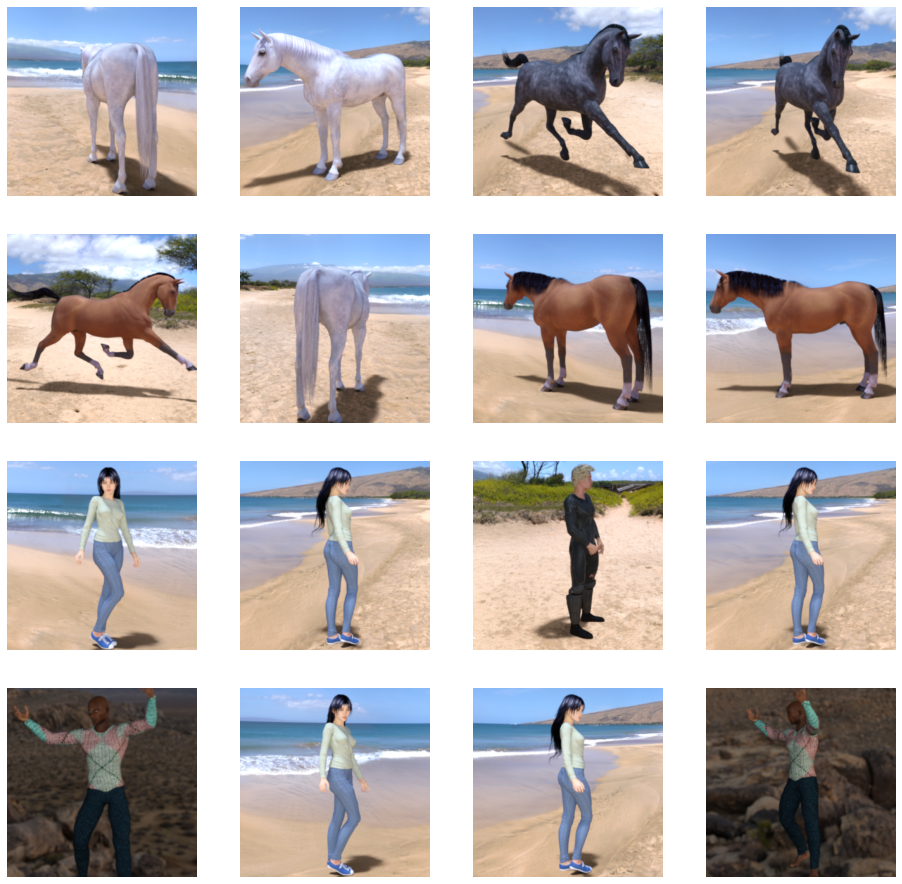

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
""""class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True"""

'"class myCallback(tf.keras.callbacks.Callback):\n  def on_epoch_end(self, epoch, logs={}):\n    if(logs.get(\'accuracy\')>0.9):\n      print("\nReached 90% accuracy so cancelling training!")\n      self.model.stop_training = True'

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
from tensorflow.keras.optimizers import RMSprop

#callbacks = myCallback()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
#validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/home/dell/tensor_flow/project/horse-or-human',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
#validation_generator = validation_datagen.flow_from_directory(
 #       '/tmp/validation-horse-or-human/',  # This is the source directory for training images
  #      target_size=(300, 300),  # All images will be resized to 300x300
   #     batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
    #    class_mode='binary')

Found 78 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator,
      epochs=5,verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6917 - accuracy: 0.4487
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.7799 - accuracy: 0.4359
Epoch 3/5
1/1 [==============================] - 0s 114ms/step - loss: 1.5363 - accuracy: 0.5641
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.8462
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.8205


In [13]:
<html> 
<body> 
   <form enctype = "multipart/form-data" action = "python_script.py" method = "post"> 
   <p>Upload File: <input type = "file" name = "filename" /></p> 
   <p><input type = "submit" value = "Upload" /></p> 
</form> 
</body> 
</html> 

SyntaxError: invalid syntax (<ipython-input-13-c0eb7e451a91>, line 1)

In [14]:
import os 
  
fileitem = form['filename'] 
  
# check if the file has been uploaded 
if fileitem.filename: 
    # strip the leading path from the file name 
    fn = os.path.basename(fileitem.filename) 
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")  
   # open read and write the file into the server 
    open(fn, 'wb').write(fileitem.file.read())

NameError: name 'form' is not defined

In [ ]:
import PIL
image = Image.open(uploaded_file)
st.image(image, caption='Uploaded Image.')

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

ModuleNotFoundError: No module named 'google.colab'